# Tutorial de Procesamiento de Imágenes

Breve introducción a conceptos de Procesamiento de Imágenes mediante ejemplos usando la librería OpenCV.

In [1]:
### En esta celda se importan las librerías principales y se configura
### para la ejecución correcta en Google Colab

import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from ipywidgets import interact, widgets

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !git clone https://github.com/felipesanmartin/TutorialCV.git
    root = 'TutorialCV/'
    from TutorialCV.hist_3d import Hist3D
    from google.colab.patches import cv2_imshow
else:
    root = ''
    from hist_3d import Hist3D
    cv2_imshow = cv2.imshow

sldr = lambda v, mi, ma, st: widgets.FloatSlider(
    value=v,
    min=mi,
    max=ma,
    step=st,
    continuous_update=False
)

<function __main__.f(r, g, b)>

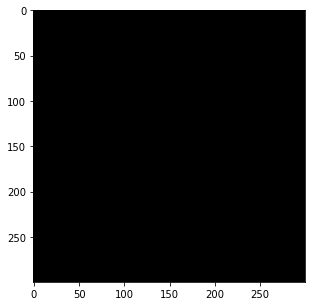

In [2]:
### Composición de colores RGB

img = np.zeros((300,300,3), np.uint8)

def f(r, g, b):
    img[:] = [r,g,b]
    fig = plt.figure(figsize = (5,5))
    plt.imshow(img)

names = [
    ['r', [0, 0, 255, 1]],
    ['g', [0, 0, 255, 1]],
    ['b', [0, 0, 255, 1]]
]

interact(f, **{s[0] : sldr(*s[1]) for s in names})

## Espacios de Color
En el siguiente ejemplo se muestra la diferencia en los histogramas 3D al usar los espacios de color RGB y HSV.
Es importante notar que el canal H es capaz de separar los colores fácilmente.

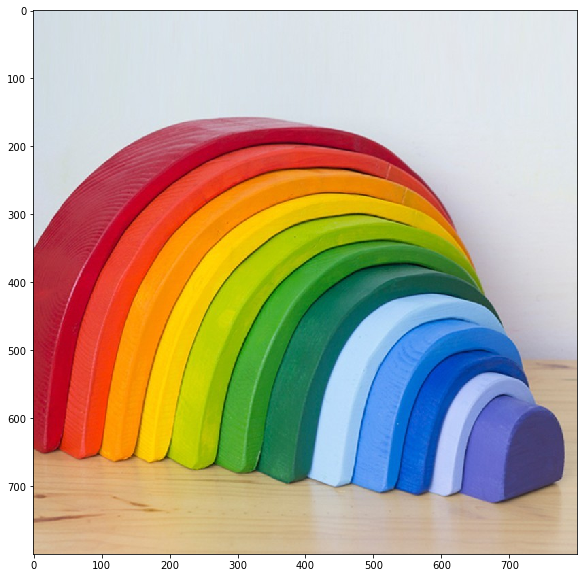

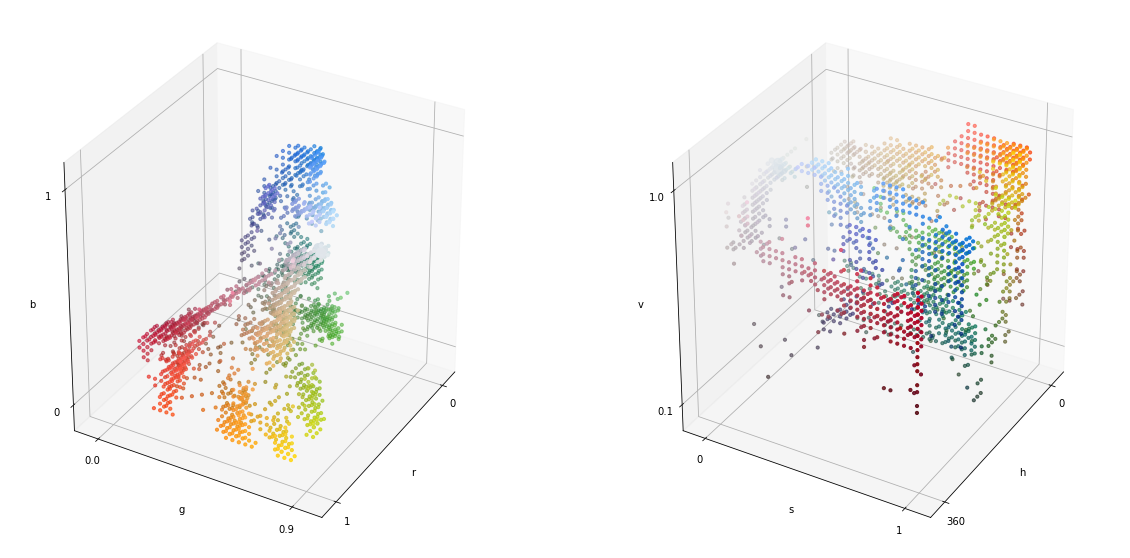

<function __main__.f(el, az)>

In [3]:
img_path = root + 'images/arcoiris.jpg'
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize = (10,10))
plt.imshow(img_rgb)

hist3d_rgb = Hist3D(img_rgb, num_bins=32, color_space = 'rgb', num_pixels = 10000)
hist3d_hsv = Hist3D(img_rgb, num_bins=32, color_space = 'hsv', num_pixels = 10000)

def f(el, az):
    fig = plt.figure(figsize = (20,10))
    ax_rgb = fig.add_subplot(121, projection='3d')
    ax_hsv = fig.add_subplot(122, projection='3d')
    hist3d_rgb.plot(ax_rgb)
    hist3d_hsv.plot(ax_hsv)
    ax_rgb.view_init(el, az)
    ax_hsv.view_init(el, az)
    plt.show()

names = [
    ['el', [30, 0., 90, 10]],
    ['az', [30, 0, 360, 10]],
]

interact(f, **{s[0] : sldr(*s[1]) for s in names})


## Suma ponderada de Imágenes
Como las imágenes son matrices, estas se pueden operar matemáticamente. En este ejemplo se ve una suma ponderada de dos imágenes.

<function __main__.f(alpha)>

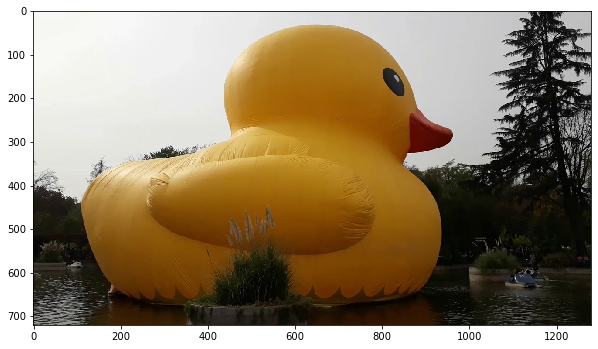

In [4]:
# Lee las imagenes
img1 = cv2.imread(root + 'images/pato_no_fail.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(root + 'images/pato_fail.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

def f(alpha):
    blend = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    fig = plt.figure(figsize = (10,10))
    plt.imshow(blend)

interact(f, **{'alpha': sldr(0.0, 0.0, 1.0, 0.01)})

## Umbralización
Es posible filtrar imágenes mediante sus valores de intensidad, para esto se utiliza la umbralización y tiene distintas variantes que se ven en el siguiente ejemplo.

<function __main__.f(thres_t, Umbral)>

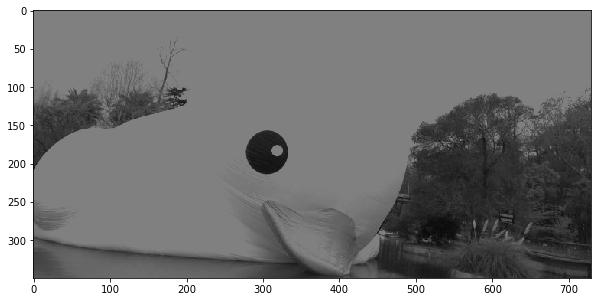

In [5]:
img_tr = cv2.imread(root + 'images/pato.jpg', cv2.IMREAD_GRAYSCALE)

thres_t_dict = {'Truncado': cv2.THRESH_TRUNC,
                'Binario': cv2.THRESH_BINARY,
                'Binario Inv.': cv2.THRESH_BINARY_INV,
                'A Cero': cv2.THRESH_TOZERO,
                'A Cero Inv.': cv2.THRESH_TOZERO_INV}

def f(thres_t, Umbral):
    thres = Umbral
    
    _, thresh = cv2.threshold(img_tr, thres, 255, thres_t_dict[thres_t])
    fig = plt.figure(figsize = (10,10))
    plt.imshow(thresh, cmap = 'gray', vmin = 0, vmax = 255)


button = widgets.ToggleButtons(
    options=['Truncado', 'Binario', 'Binario Inv.', 'A Cero', 'A Cero Inv.'],
    description='Tipo:'
)

interact(f, **{'thres_t': button, 'Umbral':sldr(128, 0, 255, 1)})

## Filtros Convolucionales
Ejemplo de tres tipos de filtros convolucionales: filtro promedio, gaussiano y mediano.

<function __main__.f(filt_t, x)>

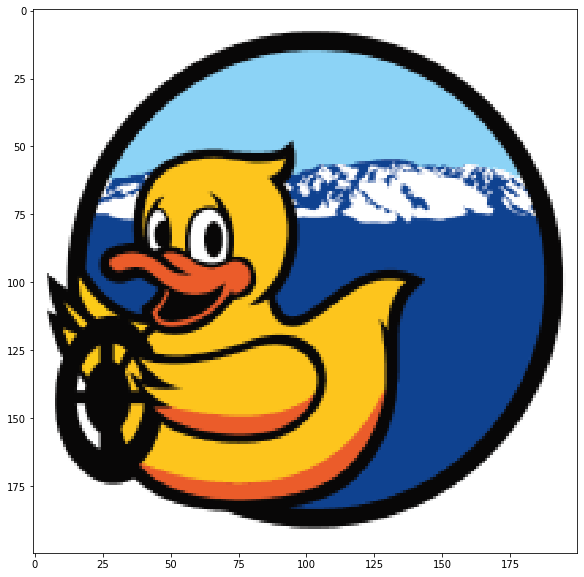

In [6]:
img_logo = cv2.imread(root + 'images/duckietown.png', cv2.IMREAD_COLOR)
img_logo = cv2.cvtColor(img_logo, cv2.COLOR_BGR2RGB)

def f(filt_t, x):
    x = int(x)
    if filt_t == 'Promedio':
        blur = cv2.blur(img_logo,(x,x))
    elif filt_t == 'Gaussiano':
        blur = cv2.GaussianBlur(img_logo,(x,x), 0)
    elif filt_t == 'Mediano':
        blur = cv2.medianBlur(img_logo, x)
    fig = plt.figure(figsize = (10,10))
    plt.imshow(blur, vmin = 0, vmax = 255)


button = widgets.ToggleButtons(
    options=['Promedio', 'Gaussiano', 'Mediano'],
    description='Tipo de Filtro:'
)

interact(f, **{'filt_t': button, 'x':sldr(1, 1, 50, 2)})

## Operaciones Morfológicas
Estas operaciones se aplican a imágenes binarias y permiten eliminar ruido, mejorar bordes, entre otras cosas.

<function __main__.f(operation, kernel_t, x)>

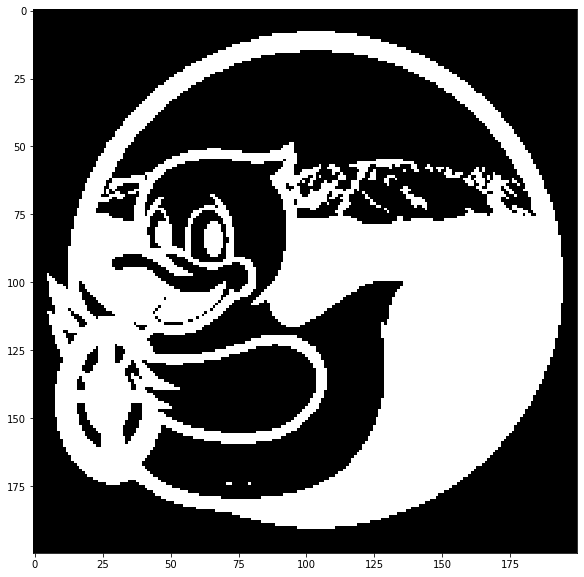

In [7]:
img_logo = cv2.imread(root + 'images/duckietown.png', cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(img_logo, 128, 255, cv2.THRESH_BINARY_INV)
    
def f(operation, kernel_t, x):
    kernelTypes = {'Rect': cv2.MORPH_RECT,
                   'Elipse': cv2.MORPH_ELLIPSE,
                   'Cruz': cv2.MORPH_CROSS}
    x = int(x)   
    kernel = cv2.getStructuringElement(kernelTypes[kernel_t], (x, x))

    if operation == 'Erosionar':
        image_out = cv2.erode(thresh, kernel, iterations = 1)
    elif operation == 'Dilatar':
        image_out = cv2.dilate(thresh, kernel, iterations = 1)
    fig = plt.figure(figsize = (10,10))
    plt.imshow(image_out, vmin = 0, vmax = 255, cmap='gray')


button_op = widgets.ToggleButtons(
    options=['Erosionar', 'Dilatar'],
    description='Operación Morfológica:'
)

button_k = widgets.ToggleButtons(
    options=['Rect', 'Elipse', 'Cruz'],
    description='Tipo de Kernel:'
)


interact(f, **{'operation': button_op, 'kernel_t': button_k, 'x':sldr(1, 1, 50, 2)})

# Detección de Bordes

El método de Canny permite detectar los bordes. Depende de dos parámetros principalmente: umbral menor y umbral mayor.

<function __main__.f(t1, t2)>

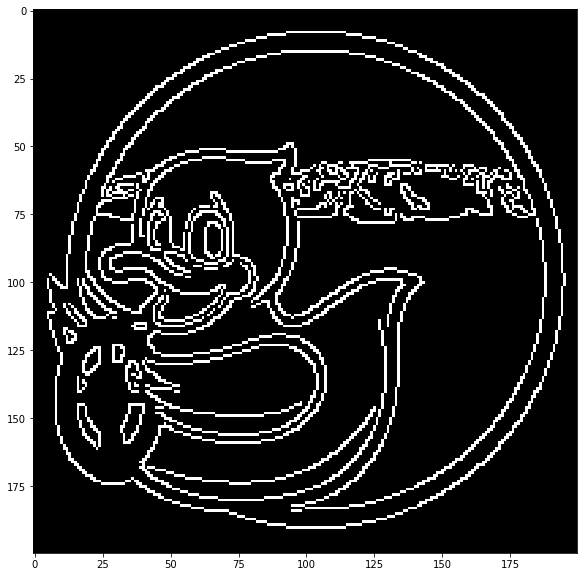

In [12]:
img_logo = cv2.imread(root + 'images/duckietown.png', cv2.IMREAD_GRAYSCALE)

def f(t1, t2):

    t1 = int(t1)
    t2 = int(t2)
    image_out = cv2.Canny(img_logo,t1,t2)
    fig = plt.figure(figsize = (10,10))
    plt.imshow(image_out, vmin = 0, vmax = 255, cmap='gray')

interact(f, **{'t1':sldr(50, 50, 255, 1), 't2':sldr(50, 50, 255, 1)})